<a href="https://colab.research.google.com/github/geetikaarora231/Uber-fare-prediction/blob/main/Machine_learning_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
!pip install gdown


In [ ]:
import gdown

In [ ]:
dataset = pd.read_csv('uber.csv')
dataset



,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [ ]:
print(dataset.columns)


Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')


In [ ]:
dataset.drop(['Unnamed: 0','key'],axis =1,inplace = True)


In [ ]:
dataset

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [ ]:
dataset.fillna(method='ffill', inplace=True) # Forward fill
dataset.isnull().sum()


fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [ ]:
dataset.describe()


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,11.359955,-72.527638,39.935885,-72.525299,39.923895,1.684535
std,9.901776,11.437787,7.720539,13.117375,6.794812,1.385997
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733824,1.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,12.500000,-73.967154,40.767158,-73.963659,40.768002,2.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


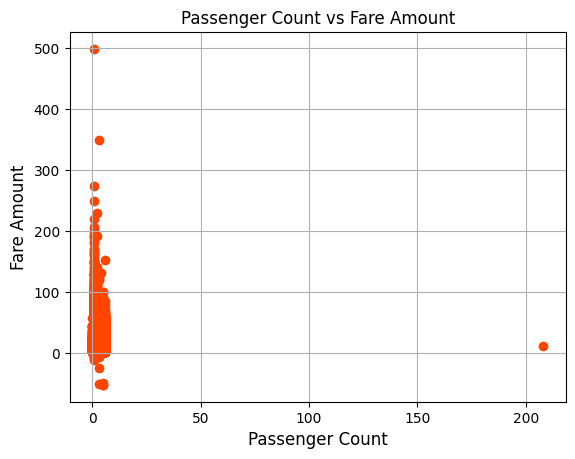

In [ ]:
plt.scatter(dataset['passenger_count'], dataset['fare_amount'], color='orangered')
plt.xlabel('Passenger Count', fontsize=12)
plt.ylabel('Fare Amount', fontsize=12)
plt.grid(True)
plt.title('Passenger Count vs Fare Amount')
plt.show()

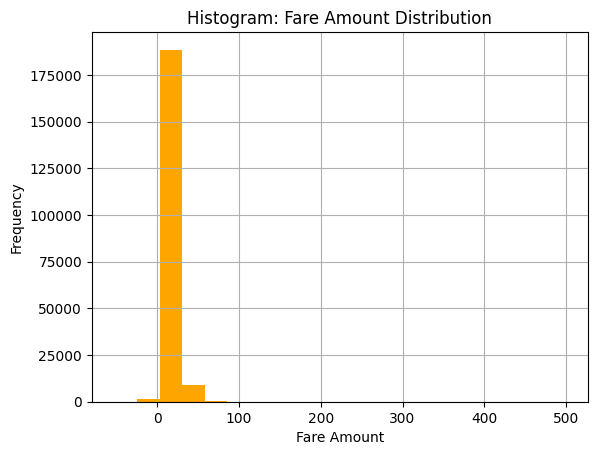

In [ ]:
plt.hist(dataset['fare_amount'], bins=20,color='orange')
plt.xlabel('Fare Amount')
plt.ylabel('Frequency')
plt.grid(True)
plt.title('Histogram: Fare Amount Distribution')
plt.show()

In [ ]:
dataset[dataset['fare_amount'].values <= 0]


,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
20744,0.00,2015-04-22 23:25:07 UTC,-73.658897,40.805199,-73.658897,40.805199,1
22182,0.00,2010-03-20 02:59:51 UTC,-73.994366,40.755395,-73.998718,40.854853,2
63395,-5.00,2015-03-03 23:07:41 UTC,-73.992249,40.748936,-73.988518,40.748180,1
71246,-3.30,2010-02-11 21:47:10 UTC,-73.952725,40.768235,-73.949928,40.772208,2
79903,-3.50,2015-05-01 14:43:02 UTC,-73.982430,40.775024,-73.981750,40.778439,1
87467,0.00,2015-01-04 03:51:13 UTC,-73.969475,40.807503,0.000000,0.000000,2
89322,-49.57,2010-03-09 08:26:10 UTC,-73.972772,40.785657,-73.972867,40.785500,5
92063,-23.70,2010-03-12 08:49:10 UTC,-73.952740,40.768233,-74.007028,40.707338,3
98875,-52.00,2015-03-20 21:31:14 UTC,-74.000359,40.728729,-74.005699,40.728680,5
104080,-7.30,2010-03-09 20:25:10 UTC,-73.952623,40.766942,-73.953787,40.784882,1


In [ ]:
dataset.drop(dataset[dataset['fare_amount'].values<=0].index,inplace=True)
dataset[dataset['fare_amount'].values<=0]


,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [ ]:
dataset['pickup_datetime'] = pd.to_datetime(dataset['pickup_datetime'])
dataset

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1
199996,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1
199997,30.9,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2
199998,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1


In [ ]:
dataset['day_of_week'] = dataset['pickup_datetime'].dt.dayofweek
dataset

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day_of_week
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,3
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,4
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,0
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,4
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,3
...,...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1,6
199996,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1,4
199997,30.9,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2,0
199998,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1,2


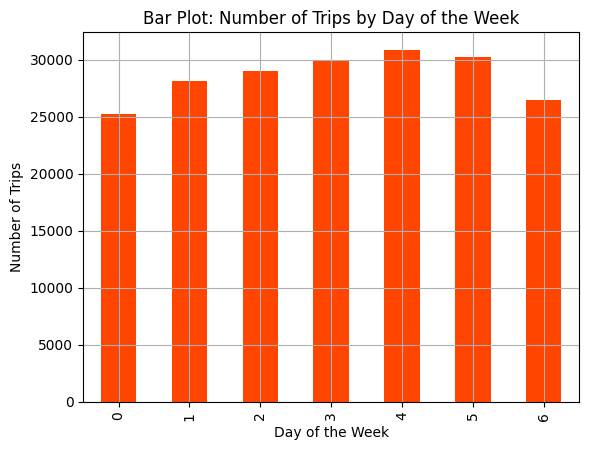

In [ ]:
trips_by_day = dataset['day_of_week'].value_counts().sort_index()
trips_by_day.plot(kind='bar',color='orangered')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trips')
plt.grid()
plt.title('Bar Plot: Number of Trips by Day of the Week')
plt.show()

<ipython-input-18-cf6298d1c2a2>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dataset.corr()


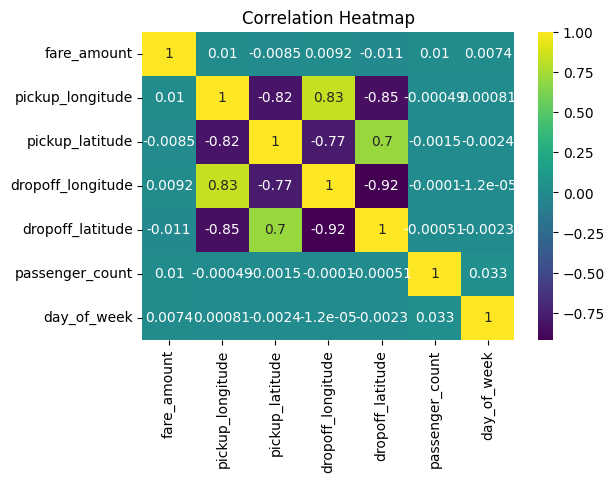

In [ ]:
!pip install seaborn
import seaborn as sns
correlation_matrix = dataset.corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt


In [ ]:
X = dataset[['passenger_count', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'day_of_week']]
y = dataset['fare_amount']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train


,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,day_of_week
3933,2,-73.953697,40.777832,-73.973035,40.786940,4
58695,1,-73.988070,40.750523,-73.982215,40.765923,5
158292,5,-73.961493,40.714243,-73.967973,40.712468,2
98589,1,-73.947991,40.724299,-73.994121,40.740854,4
167674,1,-73.988760,40.758915,-73.956258,40.784465,2
...,...,...,...,...,...,...
119890,1,-73.952148,40.783867,-73.953045,40.785847,1
103703,2,-73.952260,40.777623,-73.966674,40.764214,4
131943,5,-74.002435,40.734255,-73.996280,40.738097,1
146879,1,-73.991377,40.749513,-73.980572,40.759482,4


In [ ]:
X_test

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,day_of_week
123358,3,-73.986038,40.730762,-73.962192,40.800078,6
50057,1,-73.994013,40.724697,-73.994923,40.762680,0
167361,5,-73.961207,40.769098,-73.955095,40.767475,2
88074,2,-73.956558,40.780788,-73.969658,40.761471,1
105143,1,-73.990570,40.756420,-73.943352,40.729980,0
...,...,...,...,...,...,...
169716,1,-73.953627,40.781881,-73.955581,40.769458,0
128654,1,-73.979241,40.762352,-73.949532,40.772766,0
12292,1,-73.977527,40.758448,-74.007282,40.707243,5
111997,1,-73.994180,40.720095,-73.982157,40.732177,1


In [ ]:
y_train

3933       8.50
58695      7.70
158292     7.30
98589     22.00
167674    10.50
          ...  
119890     7.30
103703     6.50
131943    49.57
146879     6.90
121969     7.30
Name: fare_amount, Length: 139984, dtype: float64

In [ ]:
y_test

123358    19.7
50057     12.9
167361     7.7
88074     10.0
105143    19.5
          ... 
169716     5.7
128654     8.1
12292     15.7
111997     6.5
68360      7.3
Name: fare_amount, Length: 59994, dtype: float64

In [ ]:
linear_reg_model=LinearRegression()
linear_reg_model.fit(X_train,y_train)
y_pred_linear=linear_reg_model.predict(X_test)
y_pred_linear

array([11.55744347, 11.15634652, 11.52960067, ..., 11.37100225,
       11.19921116, 11.20030037])

In [ ]:
def evaluate_model(y_true, y_pred, model_name):
    rmse = sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} RMSE: {rmse:.2f}")
    print(f"{model_name} R-squared (R2): {r2:.2f}")

print("Linear Regression Model:")
evaluate_model(y_test, y_pred_linear, "Linear Regression")


Linear Regression Model:
Linear Regression RMSE: 9.83
Linear Regression R-squared (R2): 0.00


In [ ]:
new_data = np.array([new_data])  # Convert the list to a NumPy array
y_pred = linear_reg_model.predict(new_data)
y_pred

NameError: ignored

In [ ]:
new_passenger_count = 1
new_pickup_longitude = -73.986038
new_pickup_latitude = 40.730762
new_dropoff_longitude = 73.906795
new_dropoff_latitude = 40.800078
new_other_feature = 6
new_data = np.array([[new_passenger_count, new_pickup_longitude, new_pickup_latitude,
                      new_dropoff_longitude, new_dropoff_latitude, new_other_feature]])
y_pred = linear_reg_model.predict(new_data)
print(f"Predicted output for the new data: {y_pred[0]}")


Predicted output for the new data: 10.744414228709026


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


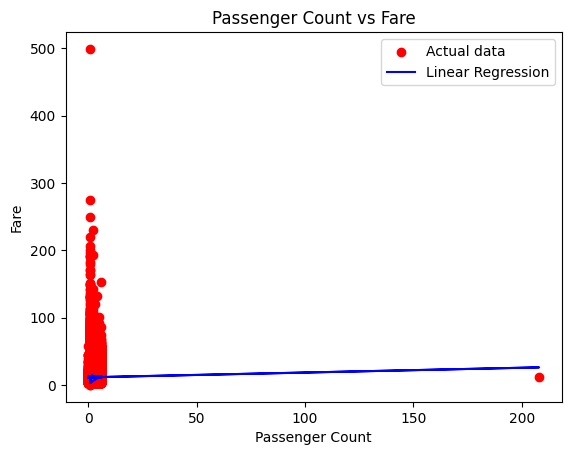

In [ ]:
plt.scatter(X_train['passenger_count'], y_train, color='red', label='Actual data')  # Scatter plot for actual values

# Assuming linear_reg_model is a trained linear regression model
plt.plot(X_train['passenger_count'], linear_reg_model.predict(X_train), color='blue', label='Linear Regression')  # Regression line

plt.title('Passenger Count vs Fare')
plt.xlabel('Passenger Count')
plt.ylabel('Fare')
plt.legend()
plt.show()

In [ ]:
poly_reg_model=LinearRegression()
linear_reg_model.fit(X_train,y_train)
y_pred_linear=linear_reg_model.predict(X_test)


In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
y_pred_rf



array([18.787, 12.209,  4.849, ..., 17.268,  6.815,  9.444])

In [ ]:
new_passenger_count = 1
new_pickup_longitude = -73.986038
new_pickup_latitude = 40.730762
new_dropoff_longitude = 73.906795
new_dropoff_latitude = 40.800078
new_other_feature = 6
new_data = np.array([[new_passenger_count, new_pickup_longitude, new_pickup_latitude,
                      new_dropoff_longitude, new_dropoff_latitude, new_other_feature]])
y_pred = rf_model.predict(new_data)
print(f"Predicted output for the new data: {y_pred[0]}")

Predicted output for the new data: 10.232000000000001


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
def evaluate_model(y_true, y_pred, model_name):
    rmse = sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} RMSE: {rmse:.2f}")
    print(f"{model_name} R-squared (R2): {r2:.2f}")

print("\nRandom Forest Regression Model:")
evaluate_model(y_test, y_pred_rf, "Random Forest Regression")


Random Forest Regression Model:
Random Forest Regression RMSE: 4.72
Random Forest Regression R-squared (R2): 0.77


In [ ]:
from sklearn.svm import SVR

svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)

def evaluate_model_svr(y_true, y_pred, model_name):
    rmse = sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} RMSE: {rmse:.2f}")
    print(f"{model_name} R-squared (R2): {r2:.2f}")

print("\nSupport Vector Regression Model:")
evaluate_model_svr(y_test, y_pred_svr, "Support Vector Regression")


In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(max_depth=5)
dt_model.fit(X_train, y_train)


y_pred_dt = dt_model.predict(X_test)


def evaluate_model_dt(y_true, y_pred, model_name):
    rmse = sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} RMSE: {rmse:.2f}")
    print(f"{model_name} R-squared (R2): {r2:.2f}")

print("\nDecision Tree Regression Model:")
evaluate_model_dt(y_test, y_pred_dt, "Decision Tree Regression")



Decision Tree Regression Model:
Decision Tree Regression RMSE: 6.22
Decision Tree Regression R-squared (R2): 0.60


In [ ]:
new_passenger_count = 1
new_pickup_longitude = -73.986038
new_pickup_latitude = 40.730762
new_dropoff_longitude = 73.906795
new_dropoff_latitude = 40.800078
new_other_feature = 6
new_data = np.array([[new_passenger_count, new_pickup_longitude, new_pickup_latitude,
                      new_dropoff_longitude, new_dropoff_latitude, new_other_feature]])
y_pred = dt_model.predict(new_data)
print(f"Predicted output for the new data: {y_pred[0]}")

Predicted output for the new data: 10.375


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

poly_reg = LinearRegression()
poly_reg.fit(X_poly_train, y_train)

y_pred_poly = poly_reg.predict(X_poly_test)

def evaluate_model_poly(y_true, y_pred, model_name):
    rmse = sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} RMSE: {rmse:.2f}")
    print(f"{model_name} R-squared (R2): {r2:.2f}")

print("\nPolynomial Regression Model:")
evaluate_model_poly(y_test, y_pred_poly, "Polynomial Regression")



Polynomial Regression Model:
Polynomial Regression RMSE: 496.97
Polynomial Regression R-squared (R2): -2553.66


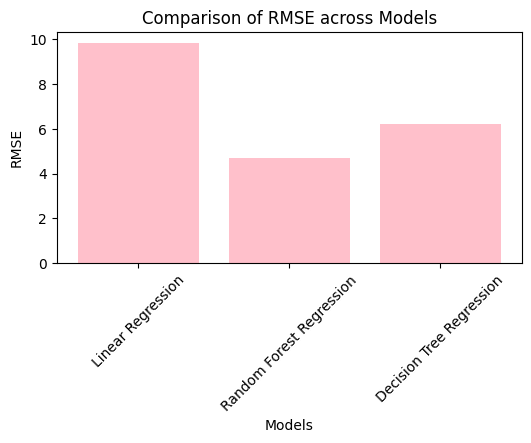

In [ ]:
model_names = ["Linear Regression", "Random Forest Regression", "Decision Tree Regression"]
rmse_values = [9.83, 4.72,6.22]

plt.figure(figsize=(6, 3))
plt.bar(model_names, rmse_values, color='pink')
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.title('Comparison of RMSE across Models')
plt.xticks(rotation=45)
plt.show()